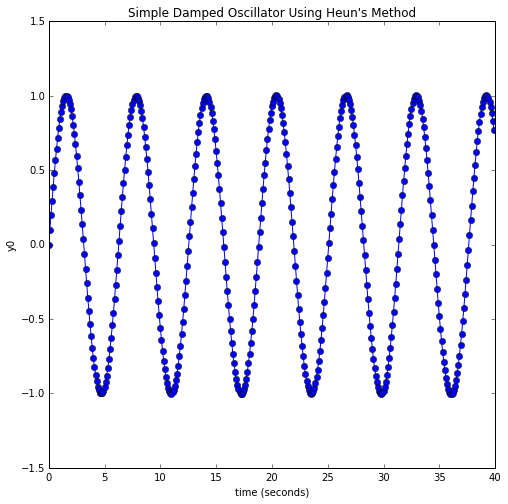

In [1]:
# Coding Problem A

from numlabs.lab4.example.test import read_init,euler4
import numpy as np
from matplotlib import pyplot as plt
import json

%matplotlib inline

#
# specify the derivs function
#
def derivs(coeff, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivitive
  f[0]=y[1]
  f[1]= -1.*coeff.c1*y[1] - coeff.c2*y[0]
  return f

# define a function for Heun's method
def heun(coeff, y, derivs):
  k1 = coeff.dt * derivs(coeff,y)
  k2 = coeff.dt * derivs(coeff,y + (2.0/3.0 * k1))
  ynew = y + (1.0/4.0) * k1 + (3.0/4.0) * k2
  return ynew

#
# first make sure we have an input file in this directory
#
initialVals={'yinitial': [0.,1.],'t_beg':0.,'t_end':40.,'dt':0.1,'c1':0.,'c2':1.}
initialVals['comment'] = 'written Oct. 17, 2015'
initialVals['plot_title'] = 'Simple Damped Oscillator Using Heun\'s Method'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff
#
        
infile='run_1.json'
coeff=read_init(infile)

#
# integrate and save the result in savedata
#
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
y=coeff.yinitial
nsteps=len(time) 
savedata=np.empty([nsteps],np.float64)
for i in range(nsteps):
    if i == 0:
        savedata[i] = y[0] # input initial condition
    else:
        y=heun(coeff,y,derivs) # call heun at each timestep
        savedata[i]=y[0]

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,savedata,'o-')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0')       

savedata_heun - savedata_midpoint:
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -1.11022302e-16  -1.11022302e-16  -1.11022302e-16
  -1.11022302e-16  -2.22044605e-16]
Very little difference between Heun's method and Midpoint method
Plot shows exponential growth, similar to the curves plotted in the previous section.


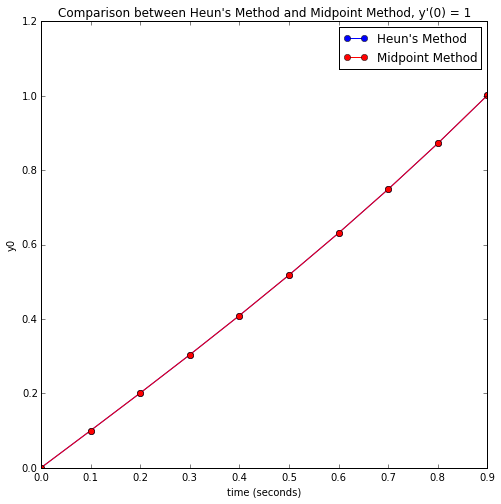

In [2]:
# Coding Problem B

# define midpoint method (taken from test.py)
def midpoint(coeff, y, derivs):
  ynew = y + coeff.dt*derivs(coeff,y + (0.5 * coeff.dt * derivs(coeff,y)))
  return ynew

# define derivative function
def derivs(coeff, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivitive
  f[0]=y[1]
  f[1]= coeff.c1*y[0] + coeff.c2*y[1] + 1.0
  return f

# initial values, with initial condition y(0) = 1
initialVals={'yinitial': [0.,1.],'t_beg':0.,'t_end':1.,'dt':0.1,'c1':1.,'c2':-1.}
initialVals['comment'] = 'written Oct. 17, 2015'
initialVals['plot_title'] = 'Comparison between Heun\'s Method and Midpoint Method, y\'(0) = 1'

infile='run_2.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff
#
        
infile='run_2.json'
coeff=read_init(infile)

#
# integrate and save the result in savedata
#
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
y_heun=coeff.yinitial
y_mid=coeff.yinitial
nsteps=len(time) 
savedata_heun=np.empty([nsteps],np.float64)
savedata_midpoint=np.empty([nsteps],np.float64)
for i in range(nsteps):
    if i == 0:
        savedata_heun[i] = y_heun[0] # input initial condition
        savedata_midpoint[i] = y_mid[0]
    else:
        y_heun=heun(coeff,y_heun,derivs) # call heun at each timestep
        y_mid=midpoint(coeff,y_mid,derivs) # call midpoint at each timestep
        savedata_heun[i]=y_heun[0]
        savedata_midpoint[i]=y_mid[0]

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,savedata_heun,'o-',label='Heun\'s Method')
theAx.plot(time,savedata_midpoint,'o-r',label='Midpoint Method')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0')       
theAx.legend(loc='best')

print('savedata_heun - savedata_midpoint:')
print(savedata_heun - savedata_midpoint)
print('Very little difference between Heun\'s method and Midpoint method')
print('Plot shows exponential growth, similar to the curves plotted in the previous section.')

savedata_heun - savedata_midpoint:
[  0.00000000e+00   1.38777878e-17   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
Again, very little difference between Heun's method and Midpoint method
Plot shows exponential decay, in contrast to the positive growth from the previous plots, because of the negative velocity IC.


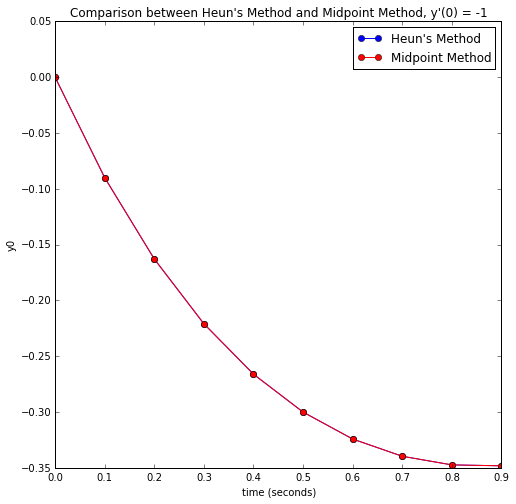

In [3]:
# initial condition, y(0) = -1
initialVals={'yinitial': [0.,-1.],'t_beg':0.,'t_end':1.,'dt':0.1,'c1':1.,'c2':-1.}
initialVals['comment'] = 'written Oct. 17, 2015'
initialVals['plot_title'] = 'Comparison between Heun\'s Method and Midpoint Method, y\'(0) = -1'

infile='run_3.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff
#
        
infile='run_3.json'
coeff=read_init(infile)

#
# integrate and save the result in savedata
#
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
y_heun=coeff.yinitial
y_mid=coeff.yinitial
nsteps=len(time) 
savedata_heun=np.empty([nsteps],np.float64)
savedata_midpoint=np.empty([nsteps],np.float64)
for i in range(nsteps):
    if i == 0:
        savedata_heun[i] = y_heun[0] # input initial condition
        savedata_midpoint[i] = y_mid[0]
    else:
        y_heun=heun(coeff,y_heun,derivs) # call heun at each timestep
        y_mid=midpoint(coeff,y_mid,derivs) # call midpoint at each timestep
        savedata_heun[i]=y_heun[0] 
        savedata_midpoint[i]=y_mid[0]

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,savedata_heun,'o-',label='Heun\'s Method')
theAx.plot(time,savedata_midpoint,'o-r',label='Midpoint Method')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0')       
theAx.legend(loc='best')

print('savedata_heun - savedata_midpoint:')
print(savedata_heun - savedata_midpoint)
print('Again, very little difference between Heun\'s method and Midpoint method')
print('Plot shows exponential decay, in contrast to the positive growth from the previous plots, because of the negative velocity IC.')

In [4]:
# There is practically no difference between Heun's method and Midpoint method for both ICs when applied to the test equation.

# Both equations have O(delta_t^2) local truncation error

# Both methods involve a "first guess" with k1, which is then refined by k2, so both are 2-step methods which require the 
# derivative at the initial point

# Although k2 is different for both (+ 2/3k1 for Heun and +1/2k1 for Midpoint), their final weightings for k1 and k2
# bring them back in line with each other, hence it's no surprise that the two methods are so similar.

